In [58]:
#I used public data available from the StockX Data Contest, which provided me with a dataset 
#of 99,956 transactions that occurred between 2017 and 2019. This dataset included two prominent 
#brands, Yeezy and Nike Off-White, as well as over 50 different sneaker styles.

#In an effort to enhance the dataset, I manually gathered information on colorways and the number of sales from 
#the StockX website. Subsequently, I converted style and color information into dummy variables. 

#For my modeling purposes, The "price premium" is calculated as the difference between the sale price of a 
#product (in this case, sneakers) and its original retail price. It represents how much more (or less) a 
#customer is willing to pay for a product compared to its original retail price. In other words, it quantifies 
#the additional amount that buyers are willing to spend, or the markup, above the standard retail cost for a 
#particular product.

#The input variables for my analysis included the number of days since  release, sneaker style, colorway, 
#shoe size, and the number of sales. These variables allowed me to develop models and gain insights into 
#the factors influencing sneaker prices in this market.

In [59]:
import pandas as pd
import numpy as np
import datetime
from datetime import date
import matplotlib.pyplot as plt
stockx_data = pd.read_excel("./StockX-Data-Contest-2019.xlsx",sheet_name="Raw Data")
color = pd.read_excel("./supplemental_data_colorway.xlsx",sheet_name="Sheet1")

In [60]:
# --- Data Cleaning ---
# calculate price premium: (sale price - retail price)/retail price
stockx_data["Price_Percentage_change"] = (stockx_data['Sale Price'] - stockx_data['Retail Price'])/stockx_data['Retail Price']

# calculate days since release: order data - release date
stockx_data["Days_Since_Release"] = (pd.to_datetime(stockx_data['Order Date']) - pd.to_datetime(stockx_data['Release Date']))/np.timedelta64('1','D')

# --- style variables ---
# style: v2
stockx_data["yeezy"] = stockx_data['Sneaker Name'].apply(lambda x : 1 if 'Yeezy' in x.split("-") else 0)
# style: airjordan
stockx_data["airjordan"] = stockx_data['Sneaker Name'].apply(lambda x : 1 if 'Jordan' in x.split("-") else 0)
# style: airforce
stockx_data["airforce"] = stockx_data['Sneaker Name'].apply(lambda x : 1 if 'Force' in x.split("-") else 0)
# style: airmax90
stockx_data["airmax90"] = stockx_data['Sneaker Name'].apply(lambda x : 1 if '90' in x.split("-") else 0)
# style: airmax97
stockx_data["airmax97"] = stockx_data['Sneaker Name'].apply(lambda x : 1 if '97' in x.split("-") else 0)
# style: presto
stockx_data["presto"] = stockx_data['Sneaker Name'].apply(lambda x : 1 if 'Presto' in x.split("-") else 0)
# style: vapormax
stockx_data["vapormax"] = stockx_data['Sneaker Name'].apply(lambda x : 1 if 'VaporMax' in x.split("-") else 0)
# style: blazer
stockx_data["blazer"] = stockx_data['Sneaker Name'].apply(lambda x : 1 if 'Blazer' in x.split("-") else 0)
# style: zoom
stockx_data["zoom"] = stockx_data['Sneaker Name'].apply(lambda x : 1 if 'Zoom' in x.split("-") else 0)
# style: zoom
stockx_data["react"] = stockx_data['Sneaker Name'].apply(lambda x : 1 if 'React' in x.split("-") else 0)

# --- state variables ---
# creating the california variable
stockx_data["California"] = stockx_data["Buyer Region"].apply(lambda x : 1 if 'California' in x else 0)
# creating the new_york variable
stockx_data["New York"] = stockx_data["Buyer Region"].apply(lambda x : 1 if 'New York' in x else 0)
# creating the oregon variable
stockx_data["Oregon"] = stockx_data["Buyer Region"].apply(lambda x : 1 if 'Oregon' in x else 0)
# creating the florida variable
stockx_data["Florida"] = stockx_data["Buyer Region"].apply(lambda x : 1 if 'Florida' in x else 0)
# creating the texas variable
stockx_data["Texas"] = stockx_data["Buyer Region"].apply(lambda x : 1 if 'Texas' in x else 0)
# creating the other_state variable
above5pct_states = ["California", "New York", "Oregon", "Florida", "Texas"]
stockx_data["Other States"] = pd.Series(list(map(int,~stockx_data["Buyer Region"].isin(above5pct_states))))


In [61]:
stockx_data = stockx_data.merge(color, left_on = 'Sneaker Name', right_on = 'Style', how = 'left')

In [62]:
stockx_data['Month'] = stockx_data['Release Date'].dt.month_name()
stockx_data['DayWeek'] = stockx_data['Release Date'].dt.day_name()
stockx_data = pd.get_dummies(stockx_data, columns = ["Month", "DayWeek"], dtype=int)
stockx_data.drop(["Month_April","DayWeek_Thursday"],axis=1)
stockx_data

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Price_Percentage_change,Days_Since_Release,...,Month_June,Month_March,Month_November,Month_October,Month_September,DayWeek_Friday,DayWeek_Saturday,DayWeek_Thursday,DayWeek_Tuesday,DayWeek_Wednesday
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220,2016-09-24,11.0,California,3.986364,342.0,...,0,0,0,0,1,0,1,0,0,0
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220,2016-11-23,11.0,California,2.113636,282.0,...,0,0,1,0,0,0,0,0,0,1
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220,2016-11-23,11.0,California,2.136364,282.0,...,0,0,1,0,0,0,0,0,0,1
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220,2016-11-23,11.5,Kentucky,3.886364,282.0,...,0,0,1,0,0,0,0,0,0,1
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220,2017-02-11,11.0,Rhode Island,2.763636,202.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99951,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,565.0,220,2018-12-26,8.0,Oregon,1.568182,49.0,...,0,0,0,0,0,0,0,0,0,1
99952,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,598.0,220,2018-12-26,8.5,California,1.718182,49.0,...,0,0,0,0,0,0,0,0,0,1
99953,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,605.0,220,2018-12-26,5.5,New York,1.750000,49.0,...,0,0,0,0,0,0,0,0,0,1
99954,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,650.0,220,2018-12-26,11.0,California,1.954545,49.0,...,0,0,0,0,0,0,0,0,0,1


In [63]:
# drop columns that have been coded
# keep retail and sales prices for further analysis
# stockx_data = stockx_data.drop(columns = ['Retail Price','Order Date', 'Brand','Sneaker Name', 'Release Date', 'Buyer Region',
#                                          'Website', 'Product Line', 'Style','weeknum', 'Nike Air Force', 'Adidas Yeezy', 
#                                           'Nike Air Max', 'Nike Zoom','Nike Air VaporMax', 'Nike Blazers', 'Air Jordan', 
#                                           'Nike React','Nike Presto'])
stockx_data = stockx_data.drop(columns = ['Order Date', 'Brand','Sneaker Name', 'Release Date', 'Buyer Region',
                                         'Website', 'Product Line', 'Style'])

In [64]:
# turn all the nan value to the 0
stockx_data = stockx_data.fillna(0)

#### Linear Regression and Comparison to Regularized Models

In [65]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
y = stockx_data["Price_Percentage_change"]
X = sm.add_constant(stockx_data.drop(["Sale Price",'Price_Percentage_change', "Other States", "New York", "Texas"], axis = 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=808)

In [66]:
import statsmodels.api as sm

LinReg = sm.OLS(y_train,X_train)
results = LinReg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Price_Percentage_change   R-squared:                       0.823
Model:                                 OLS   Adj. R-squared:                  0.823
Method:                      Least Squares   F-statistic:                     7801.
Date:                     Mon, 04 Dec 2023   Prob (F-statistic):               0.00
Time:                             19:24:21   Log-Likelihood:                -64560.
No. Observations:                    66970   AIC:                         1.292e+05
Df Residuals:                        66929   BIC:                         1.296e+05
Df Model:                               40                                         
Covariance Type:                 nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.7606      0.180     32.060      0.000       5.408       6.113
Retail Price          -0.0305      0.001    -21.492      0.000      -0.033      -0.028
Shoe Size              0.0077      0.001      7.144      0.000       0.006       0.010
Days_Since_Release    -0.0002   2.17e-05     -7.356      0.000      -0.000      -0.000
yeezy                  1.4767      0.067     22.081      0.000       1.346       1.608
airjordan              3.9923      0.036    110.499      0.000       3.922       4.063
airforce               0.8493      0.030     28.773      0.000       0.791       0.907
airmax90              -0.4629      0.043    -10.817      0.000      -0.547      -0.379
airmax97               0.7576      0.040     18.826      0.000       0.679       0.836
presto                 0.2522      0.036      7.063      0.000       0.182       0.322
vapormax               0.1641      0.109      1.499      0.134      -0.050       0.379
blazer                -0.1036      0.055     -1.876      0.061      -0.212       0.005
zoom                  -0.8800      0.023    -37.795      0.000      -0.926      -0.834
react                 -0.2850      0.055     -5.154      0.000      -0.393      -0.177
California             0.0366      0.006      5.748      0.000       0.024       0.049
Oregon                 0.0567      0.010      5.837      0.000       0.038       0.076
Florida                0.0305      0.010      2.999      0.003       0.011       0.051
Black                  0.6868      0.025     27.200      0.000       0.637       0.736
White                  1.6806      0.031     54.026      0.000       1.620       1.742
Grey                   0.1810      0.025      7.187      0.000       0.132       0.230
Red                    0.8043      0.034     23.412      0.000       0.737       0.872
Green                  0.2742      0.059      4.627      0.000       0.158       0.390
Neo                    0.8030      0.026     31.358      0.000       0.753       0.853
Orange                 0.7714      0.034     22.667      0.000       0.705       0.838
Tan/Brown              0.8324      0.047     17.728      0.000       0.740       0.924
Pink                   1.1273      0.039     28.924      0.000       1.051       1.204
Blue                  -1.8074      0.029    -61.398      0.000      -1.865      -1.750
Colorful               0.0525      0.019      2.713      0.007       0.015       0.090
Number of Sales    -9.386e-05   1.21e-06    -77.330      0.000   -9.62e-05   -9.15e-05
Month_April            1.0938      0.039     28.217      0.000       1.018       1.170
Month_August          -0.1174      0.034     -3.495      0.000      -0.183      -0.052
Month_December        -1.2464      0.033    -38.207      0.000      -1

In [68]:
#Normal Linear Regression
y_pred = results.predict(X_test)

RSS = np.sum((y_test - y_pred)**2)
SST = np.sum((y_test - np.mean(y_train))**2)
OSR2 = 1- RSS/SST

from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(y_pred,y_test))

print(OSR2)
RMSE

0.8277172221685425


0.625082880747249

In [69]:
#Lasso Regularization
LinRegreg = sm.OLS(y_train,X_train)
results1 = LinRegreg.fit_regularized(L1_wt=1.0)
y_pred1 = results1.predict(X_test)

RSS = np.sum((y_test - y_pred1)**2)
SST = np.sum((y_test - np.mean(y_train))**2)
OSR2 = 1- RSS/SST

from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(y_pred1,y_test))

print(OSR2)
RMSE

0.8195489059274661


0.6397295796030287

In [70]:
#Ridge Regularization
LinRegreg = sm.OLS(y_train,X_train)
results1 = LinRegreg.fit_regularized(L1_wt=0.0)
y_pred2 = results1.predict(X_test)

RSS = np.sum((y_test - y_pred2)**2)
SST = np.sum((y_test - np.mean(y_train))**2)
OSR2 = 1- RSS/SST

from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(y_pred2,y_test))

print(OSR2)
RMSE

0.8277167695913382


0.6250837017755618

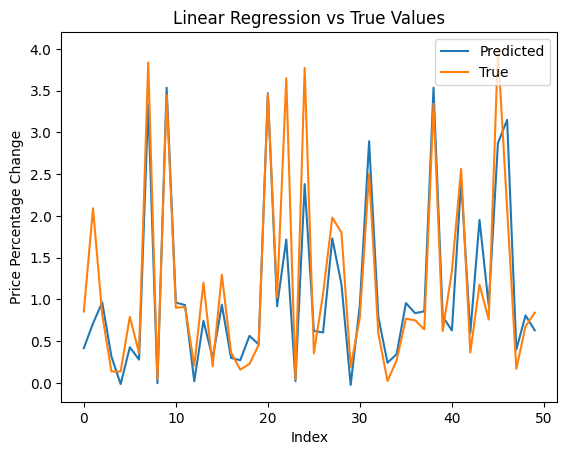

In [71]:
plt.plot(y_pred[0:50].reset_index().drop("index", axis=1),label = "Predicted")
plt.plot(y_test[0:50].reset_index().drop("index", axis=1), label = "True")
plt.title("Linear Regression vs True Values")
plt.xlabel("Index")
plt.ylabel("Price Percentage Change")
plt.legend()